# 0. Enviorment set

In [14]:
import zipfile
import os
import glob
import pandas as pd

# 1. Dataset load

In [4]:
# data_path = '/aiffel/aiffel/AIFFELThon/data/results_multimodal_labeled_sentences.zip'
# extract_path = '/aiffel/aiffel/AIFFELThon/data/dummy'  

# data_path = '/aiffel/aiffel/AIFFELThon/data/input/merged_original.zip'
# extract_path = '/aiffel/aiffel/AIFFELThon/data/'  # 압축을 풀어둘 경로

In [3]:
# 1) 압축 풀기
# with zipfile.ZipFile(data_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# 2) CSV 파일 경로 수집
#   압축을 풀면 폴더가 생성되었다고 가정.
# csv_files = glob.glob(os.path.join(extract_path, '*.csv'))

# 3) CSV 파일 각각을 DataFrame으로 읽은 뒤 하나로 합치기
df_list = []
for file in csv_files:
    tmp_df = pd.read_csv(file)
    df_list.append(tmp_df)

merged_df = pd.concat(df_list, ignore_index=True)

In [46]:
# 누락 데이터 보완 후 재확인
print(f"불러온 CSV 파일 수: {len(csv_files)}")
print(f"합쳐진 DataFrame 크기: {merged_df.shape}")
merged_df.head()

불러온 CSV 파일 수: 22
합쳐진 DataFrame 크기: (78985, 26)


,file_index,clip_id,actor,category,nr_frame,frame,object_id,label,predicate,person_id,...,sound_valence,sound_emotion,sound_arousal,multimodal_valence,multimodal_emotion,multimodal_arousal,text_valence,text_emotion,text_arousal,unit_folder
0,0801-1200_801_1,801,"{'41': {'age': 'under_10s', 'gender': 'female'...",foods,935,128,2,person,{'3': 'sit'},41,...,3,angry,6,2,angry,7,6,neutral,3,0801-1200
1,0801-1200_801_2,801,"{'41': {'age': 'under_10s', 'gender': 'female'...",foods,935,805,1,person,{'1': 'sit'},42,...,2,dislike,7,5,neutral,7,4,dislike,6,0801-1200
2,0801-1200_801_3,801,"{'41': {'age': 'under_10s', 'gender': 'female'...",foods,935,63,2,person,{'3': 'sit'},41,...,5,neutral,4,5,neutral,4,5,neutral,1,0801-1200
3,0801-1200_801_4,801,"{'41': {'age': 'under_10s', 'gender': 'female'...",foods,935,417,2,person,{'3': 'sit'},41,...,3,dislike,3,5,neutral,6,5,neutral,1,0801-1200
4,0801-1200_801_5,801,"{'41': {'age': 'under_10s', 'gender': 'female'...",foods,935,650,2,person,{'3': 'sit'},41,...,5,neutral,6,7,happy,5,6,neutral,6,0801-1200


In [56]:
# merged_df = merged_df.sort_values(by=['clip_id', 'script_start'], ascending=[True, True])
# merged_df.to_csv(os.path.join('/aiffel/aiffel/AIFFELThon/data', 'output', 'all_56000.csv'), index=False)

# 2. Add Pre-Post 5 sentences about Each Sentence

### 새로운 데이터프레임 생성

In [57]:
source_labeled_data = merged_df[['file_index', 'unit_folder', 'clip_id', 'category', 'person_id', 'script', 'script_start', 'script_end', \
           'intent', 'sound_emotion', 'multimodal_emotion', 'text_emotion']].copy()
source_labeled_data.head()

,file_index,unit_folder,clip_id,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion
50573,0001-0400_1_1,0001-0400,1,living,1,"야, 여기 있던 내 옷 못 봤어?",31,131,question,surprise,neutral,neutral
50578,0001-0400_1_6,0001-0400,1,living,2,무슨 옷 말하는 건데?,141,194,question,dislike,neutral,fear
50576,0001-0400_1_4,0001-0400,1,living,1,"그거, 내가 생일에 친구한테 선물받은 원피스!",211,302,statement,surprise,neutral,angry
50582,0001-0400_1_10,0001-0400,1,living,2,친구한테… 선물 받은 거?,331,416,statement,surprise,fear,fear
50580,0001-0400_1_8,0001-0400,1,living,1,"그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아.",423,519,statement,happy,neutral,angry


### 데이터 정렬 및 확인

In [58]:
# clip_id와 script_start 기준으로 정렬
sorted_data = source_labeled_data.sort_values(by=['clip_id', 'script_start'], ascending=[True, True])

sorted_data

,file_index,unit_folder,clip_id,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion
50573,0001-0400_1_1,0001-0400,1,living,1,"야, 여기 있던 내 옷 못 봤어?",31,131,question,surprise,neutral,neutral
50578,0001-0400_1_6,0001-0400,1,living,2,무슨 옷 말하는 건데?,141,194,question,dislike,neutral,fear
50576,0001-0400_1_4,0001-0400,1,living,1,"그거, 내가 생일에 친구한테 선물받은 원피스!",211,302,statement,surprise,neutral,angry
50582,0001-0400_1_10,0001-0400,1,living,2,친구한테… 선물 받은 거?,331,416,statement,surprise,fear,fear
50580,0001-0400_1_8,0001-0400,1,living,1,"그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아.",423,519,statement,happy,neutral,angry
...,...,...,...,...,...,...,...,...,...,...,...,...
11723,5201-5600_5600_10,5201-5600,5600,relationship,280,수지야? 너 뭐 한거야….,1504,1619,question,surprise,surprise,fear
11717,5201-5600_5600_4,5201-5600,5600,relationship,279,미안해. 현아 씨한테는 내가 전할게.,1619,1738,response,dislike,dislike,sad
11719,5201-5600_5600_6,5201-5600,5600,relationship,280,수지야… 살려줘…,1738,1873,request,fear,fear,neutral
11724,5201-5600_5600_11,5201-5600,5600,relationship,279,안녕.,1873,1908,greeting_call,contempt,angry,neutral


In [17]:
# 누락데이터 보완 전: 5551 rows × 11 columns
# sorted_data.groupby('clip_id').count()

,file_index,unit_folder,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion
clip_id,,,,,,,,,,,
1,10,10,10,10,10,10,10,10,10,10,10
2,10,10,10,10,10,10,10,10,10,10,10
3,13,13,13,13,13,13,13,13,13,13,13
4,11,11,11,11,11,11,11,11,11,11,11
5,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...
5596,11,11,11,11,11,11,11,11,11,11,11
5597,15,15,15,15,15,15,15,15,15,15,15
5598,15,15,15,15,15,15,15,15,15,15,15


In [59]:
# 누락데이터 보완 후
sorted_data.groupby('clip_id').count()

,file_index,unit_folder,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion
clip_id,,,,,,,,,,,
1,10,10,10,10,10,10,10,10,10,10,10
2,10,10,10,10,10,10,10,10,10,10,10
3,13,13,13,13,13,13,13,13,13,13,13
4,11,11,11,11,11,11,11,11,11,11,11
5,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...
5596,11,11,11,11,11,11,11,11,11,11,11
5597,15,15,15,15,15,15,15,15,15,15,15
5598,15,15,15,15,15,15,15,15,15,15,15


In [60]:
grouped_data = sorted_data.groupby('clip_id')['script'].apply(list)
grouped_data.head()

clip_id
1    [야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ...
2    [새나야, 나 내일 지각할 거 같아. 니가 미리 자리 좀 맡아줘., 오늘도 아니고 ...
3    [나 차 사려고., 차를 산다고?, 응, 한대 뽑기로 했어., 야, 니가 무슨 돈이...
4    [수인아, 어디서 무슨 냄새 좀 나는 것 같지 않아?, 냄새…? 무슨 냄새?, 그냥...
5    [저기요, 방금 세탁기 돌리신 거 그 쪽 맞죠?, 아.. 네. 맞는데요., 휴.. ...
Name: script, dtype: object

In [61]:
len(grouped_data)

5600

### 앞뒤 5문장 추가한 새로운 컬럼 생성 

In [62]:
# 앞뒤 5개 문장을 포함한 리스트 생성 함수
def get_pre_post_sentences(group):
    sentences = group['script'].tolist()
    pre_post_sentences = []

    for i in range(len(sentences)):
        # 앞뒤 5개 문장 선택
        start_idx = max(0, i - 5)
        end_idx = min(len(sentences), i + 6)

        # 해당 문장과 앞뒤 문장을 리스트로 생성
        context = sentences[start_idx:end_idx]
        pre_post_sentences.append(context)

    # 원본 데이터프레임에 새로운 리스트 열 추가
    group['pre_post_5_sentences'] = pre_post_sentences
    return group
     

In [63]:
result = sorted_data.groupby('clip_id').apply(get_pre_post_sentences)
result

,file_index,unit_folder,clip_id,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion,pre_post_5_sentences
50573,0001-0400_1_1,0001-0400,1,living,1,"야, 여기 있던 내 옷 못 봤어?",31,131,question,surprise,neutral,neutral,"[야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ..."
50578,0001-0400_1_6,0001-0400,1,living,2,무슨 옷 말하는 건데?,141,194,question,dislike,neutral,fear,"[야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ..."
50576,0001-0400_1_4,0001-0400,1,living,1,"그거, 내가 생일에 친구한테 선물받은 원피스!",211,302,statement,surprise,neutral,angry,"[야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ..."
50582,0001-0400_1_10,0001-0400,1,living,2,친구한테… 선물 받은 거?,331,416,statement,surprise,fear,fear,"[야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ..."
50580,0001-0400_1_8,0001-0400,1,living,1,"그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아.",423,519,statement,happy,neutral,angry,"[야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,5201-5600_5600_10,5201-5600,5600,relationship,280,수지야? 너 뭐 한거야….,1504,1619,question,surprise,surprise,fear,"[당신을 정말 사랑했어. 근데, 그래서 더 화가 나., 수지야. 너 왜그래.. ..."
11717,5201-5600_5600_4,5201-5600,5600,relationship,279,미안해. 현아 씨한테는 내가 전할게.,1619,1738,response,dislike,dislike,sad,"[ 수지야. 너 왜그래.. , 내가 가질 수 없는 건 싫어…., 뭐? 으..."
11719,5201-5600_5600_6,5201-5600,5600,relationship,280,수지야… 살려줘…,1738,1873,request,fear,fear,neutral,"[내가 가질 수 없는 건 싫어…., 뭐? 으아…. 왜 이렇게 아프지., 내가 잘못..."
11724,5201-5600_5600_11,5201-5600,5600,relationship,279,안녕.,1873,1908,greeting_call,contempt,angry,neutral,"[뭐? 으아…. 왜 이렇게 아프지., 내가 잘못한 게 아니야. 당신이 잘못한 거야..."


In [65]:
# result.to_csv(os.path.join(extract_path, 'output', 'pre-post_5_result.csv'), index=False)

# 3. Merge Unmatched labeling data

In [66]:
merged_df = result.sort_values(by=['clip_id', 'script_start'], ascending=[True, True])

In [67]:
# 데이터프레임에 존재한다고 가정하는 컬럼: sound_emotion (s), multimodal_emotion (m), text_emotion (t)

# 1. m=s=t: 분명하게 해당 감정이라고 동의하는 데이터
merged_df['cond_1'] = (
    (merged_df['multimodal_emotion'] == merged_df['sound_emotion']) &
    (merged_df['sound_emotion'] == merged_df['text_emotion'])
)

# 2. m=s≠t: 텍스트만 있으면 정확하게 감정 파악 X인 데이터
merged_df['cond_2'] = (
    (merged_df['multimodal_emotion'] == merged_df['sound_emotion']) &
    (merged_df['sound_emotion'] != merged_df['text_emotion'])
)

# 3. m=t≠s: 이미지와 텍스트로 판단한 감정과 음성을 듣고 판단한 감정이 다른 데이터
merged_df['cond_3'] = (
    (merged_df['multimodal_emotion'] == merged_df['text_emotion']) &
    (merged_df['sound_emotion'] != merged_df['text_emotion'])
)

# 4. m≠s=t: 음성과 텍스트 각각 판단했을 때는 부정확하지만 두 정보 취합 시 정확한 감정 태깅 가능한 경우의 데이터
merged_df['cond_4'] = (
    (merged_df['sound_emotion'] == merged_df['text_emotion']) &
    (merged_df['multimodal_emotion'] != merged_df['sound_emotion'])
)

# 5. m≠s≠t: 모든 정보가 다르고, 불일치 데이터
merged_df['cond_5'] = (
    (merged_df['multimodal_emotion'] != merged_df['sound_emotion']) &
    (merged_df['sound_emotion'] != merged_df['text_emotion']) &
    (merged_df['multimodal_emotion'] != merged_df['text_emotion'])
)


In [68]:
# 조건별 데이터프레임 분리
cond_1_df = merged_df[merged_df['cond_1']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_2_df = merged_df[merged_df['cond_2']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_3_df = merged_df[merged_df['cond_3']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_4_df = merged_df[merged_df['cond_4']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_5_df = merged_df[merged_df['cond_5']].drop(columns=[f'cond_{i}' for i in range(1, 6)])

# 결과 확인
print(f"cond_1 데이터 개수: {len(cond_1_df)} (m=s=t: 분명하게 해당 감정이라고 동의하는 데이터)")
print(f"cond_2 데이터 개수: {len(cond_2_df)} (m=s≠t: 텍스트만 있으면 정확하게 감정 파악 X인 데이터)")
print(f"cond_3 데이터 개수: {len(cond_3_df)} (m=t≠s: 이미지와 텍스트로 판단한 감정과 음성을 듣고 판단한 감정이 다른 데이터)")
print(f"cond_4 데이터 개수: {len(cond_4_df)} (m≠s=t: 음성과 텍스트 각각 판단했을 때는 부정확하지만 두 정보 취합 시 정확한 감정 태깅 가능한 경우의 데이터)")
print(f"cond_5 데이터 개수: {len(cond_5_df)} (m≠s≠t: 모든 정보 불일치, 위와 동일)")

cond_1 데이터 개수: 20607 (m=s=t: 분명하게 해당 감정이라고 동의하는 데이터)
cond_2 데이터 개수: 35865 (m=s≠t: 텍스트만 있으면 정확하게 감정 파악 X인 데이터)
cond_3 데이터 개수: 4710 (m=t≠s: 이미지와 텍스트로 판단한 감정과 음성을 듣고 판단한 감정이 다른 데이터)
cond_4 데이터 개수: 6150 (m≠s=t: 음성과 텍스트 각각 판단했을 때는 부정확하지만 두 정보 취합 시 정확한 감정 태깅 가능한 경우의 데이터)
cond_5 데이터 개수: 11653 (m≠s≠t: 모든 정보 불일치, 위와 동일)


In [74]:
condition_dfs = [cond_1_df, cond_2_df, cond_3_df, cond_4_df, cond_5_df]

for i, df in enumerate(condition_dfs, start=1):
    df.to_csv(os.path.join(extract_path, f'cond_{i}_df.csv'), index=False)

### dataframe 확인

In [70]:
cond_1_df.head()

,file_index,unit_folder,clip_id,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion,pre_post_5_sentences
50581,0001-0400_1_9,0001-0400,1,living,2,아.. 그거… 그거 내가 저번에 한 번 입었어.,531,647,statement,fear,fear,fear,"[야, 여기 있던 내 옷 못 봤어?, 무슨 옷 말하는 건데?, 그거, 내가 생일에 ..."
50577,0001-0400_1_5,0001-0400,1,living,1,뭐? 그걸 니가 왜 입어?,656,724,question,angry,angry,angry,"[무슨 옷 말하는 건데?, 그거, 내가 생일에 친구한테 선물받은 원피스!, 친구한테..."
50579,0001-0400_1_7,0001-0400,1,living,1,야! 내 허락도 없이 니 맘대로 그걸 입으면 어떡해!,851,957,expression,angry,angry,angry,"[친구한테… 선물 받은 거?, 그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아..."
50575,0001-0400_1_3,0001-0400,1,living,2,"됐다, 됐어, 나도 이제 치사해서 안 입는다!",966,1046,response,angry,angry,angry,"[그래, 그 남색에, 어깨 부분에 장식 달린 거 있잖아., 아.. 그거… 그거 내가..."
50586,0001-0400_2_4,0001-0400,2,entertainment,2,너 아직도 정신 못 차렸구나.,357,445,statement,contempt,contempt,contempt,"[새나야, 나 내일 지각할 거 같아. 니가 미리 자리 좀 맡아줘., 오늘도 아니고 ..."


In [71]:
cond_2_df.head()

,file_index,unit_folder,clip_id,category,person_id,script,script_start,script_end,intent,sound_emotion,multimodal_emotion,text_emotion,pre_post_5_sentences
50589,0001-0400_2_7,0001-0400,2,entertainment,2,오늘도 아니고 내일 지각한다는 게 뭔 소리야?,147,254,question,surprise,surprise,dislike,"[새나야, 나 내일 지각할 거 같아. 니가 미리 자리 좀 맡아줘., 오늘도 아니고 ..."
50592,0001-0400_2_10,0001-0400,2,entertainment,1,정신 못차렸다니 그게 뭔 소리야.,487,558,question,neutral,neutral,dislike,"[새나야, 나 내일 지각할 거 같아. 니가 미리 자리 좀 맡아줘., 오늘도 아니고 ..."
50598,0001-0400_3_6,0001-0400,3,science,2,"야, 니가 무슨 돈이 있어서 차를 사냐? 아빠가 사주신대?",224,341,question,surprise,surprise,contempt,"[나 차 사려고., 차를 산다고?, 응, 한대 뽑기로 했어., 야, 니가 무슨 돈이..."
50597,0001-0400_3_5,0001-0400,3,science,2,내가 돈이 어딨냐? 덕분에 면허 딴 지 오 년 넘게 장롱면허 신세인데.,631,776,expression,sad,sad,dislike,"[응, 한대 뽑기로 했어., 야, 니가 무슨 돈이 있어서 차를 사냐? 아빠가 사주신..."
50604,0001-0400_3_12,0001-0400,3,science,1,내가 차 사면 너 한 번 태워 줄게.,821,881,promise,neutral,neutral,happy,"[야, 니가 무슨 돈이 있어서 차를 사냐? 아빠가 사주신대?, 응. 이번에 성과급 ..."


# 4. 데이터 분포 시각화

## 1) 각 condition dataframe 별 감정 분포 시각화

In [72]:
import matplotlib.pyplot as plt

# 텍스트와 감정 분포 시각화 함수
def plot_distributions(df, emotion_type, condition_name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), tight_layout=True)
    
    # 텍스트 감정 분포 (text_emotion 기준)
    data_counts = df[f'{emotion_type}_emotion'].value_counts()
    axes[0].bar(data_counts.index, data_counts.values)
    axes[0].set_title(f'{condition_name}: {emotion_type} Emotion Distribution')
    axes[0].set_xlabel('Emotion')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # 주요 감정 분포 (multimodal, sound, text_emotion 기준)
    emotion_columns = ['multimodal_emotion', 'sound_emotion', 'text_emotion']
    all_emotions = pd.concat([df[col] for col in emotion_columns])
    emotion_counts = all_emotions.value_counts()
    axes[1].bar(emotion_counts.index, emotion_counts.values)
    axes[1].set_title(f'{condition_name}: Overall Emotion Distribution')
    axes[1].set_xlabel('Emotion')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    plt.show()

# 각 조건별 데이터프레임 분포 시각화
conditions = [
    (cond_1_df, "Condition 1 (m=s=t)"),
    (cond_2_df, "Condition 2 (m=s≠t)"),
    (cond_3_df, "Condition 3 (m=t≠s)"),
    (cond_4_df, "Condition 4 (m≠s=t)"),
    (cond_5_df, "Condition 5 (m≠s≠t)"),
]

def process(df, emotion_type, condition_name):
    for df, condition_name in conditions:
        print(f"{condition_name} - 데이터 개수: {len(df)}")
        plot_distributions(df, emotion_type, condition_name)

Condition 1 (m=s=t) - 데이터 개수: 20607


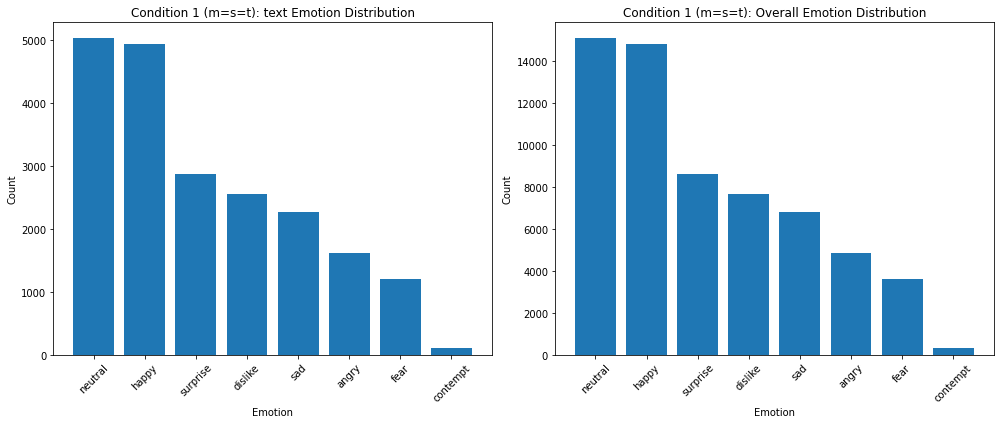

Condition 2 (m=s≠t) - 데이터 개수: 35865


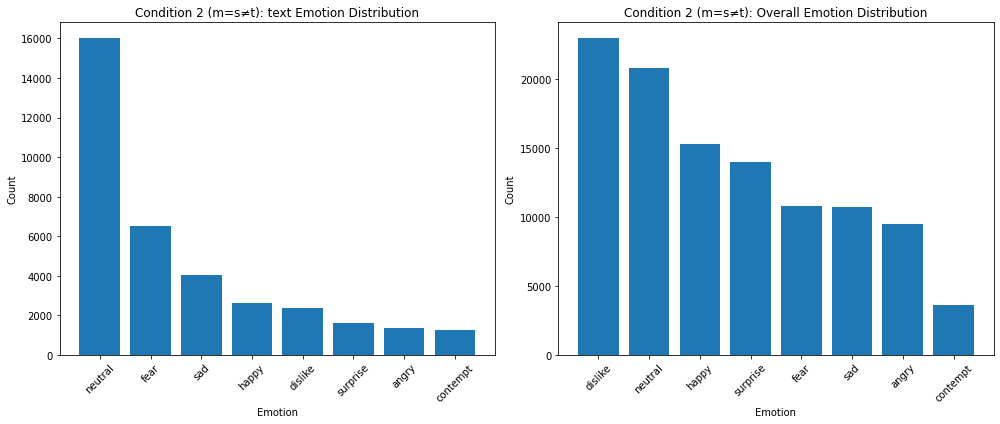

Condition 3 (m=t≠s) - 데이터 개수: 4710


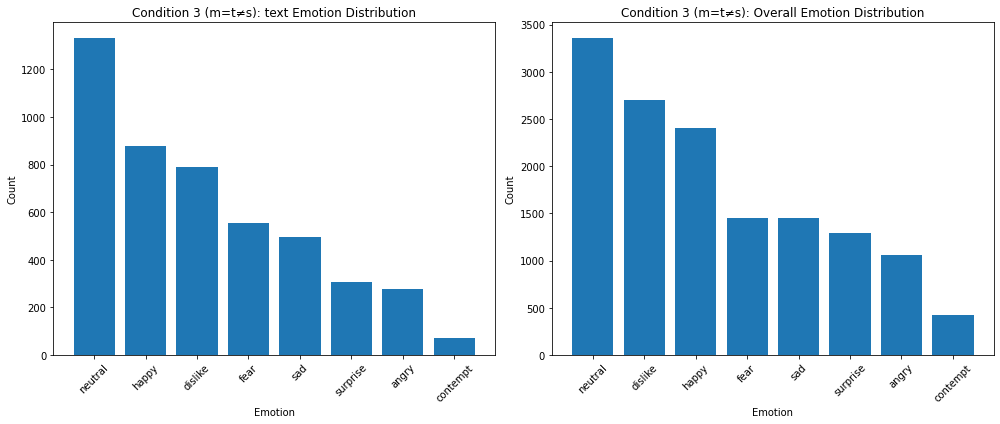

Condition 4 (m≠s=t) - 데이터 개수: 6150


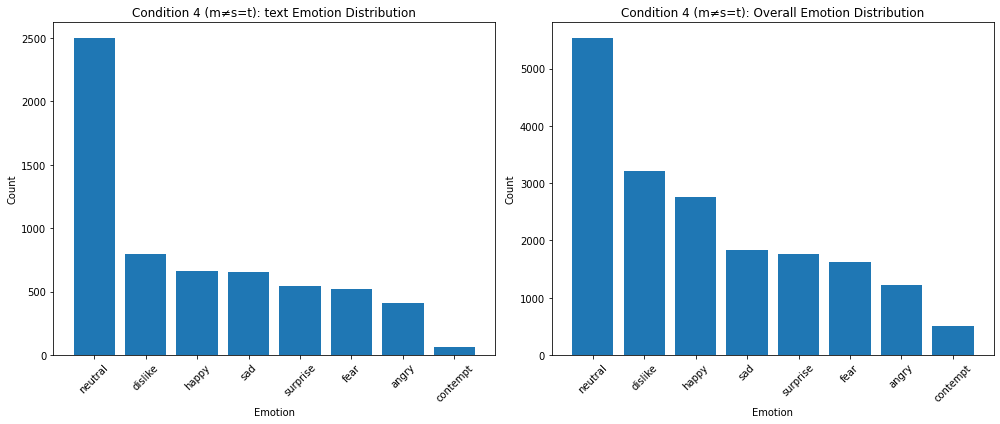

Condition 5 (m≠s≠t) - 데이터 개수: 11653


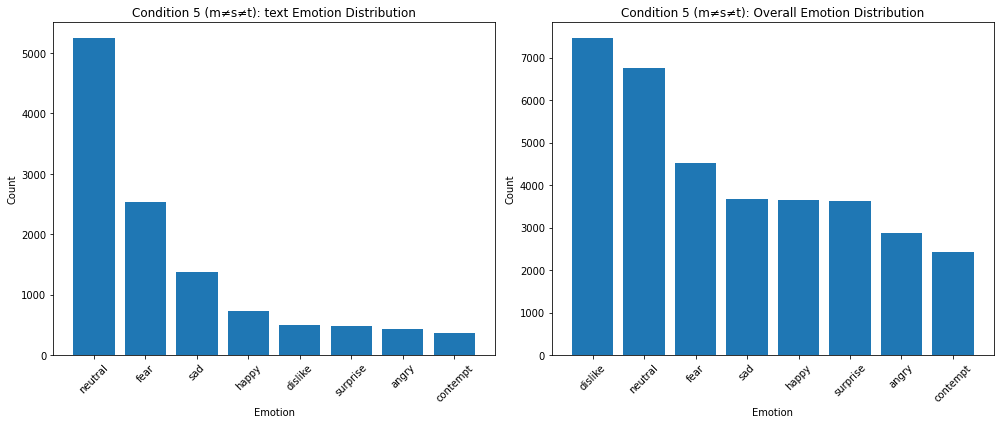

In [73]:
process(df, 'text', conditions)

Condition 1 (m=s=t) - 데이터 개수: 20369


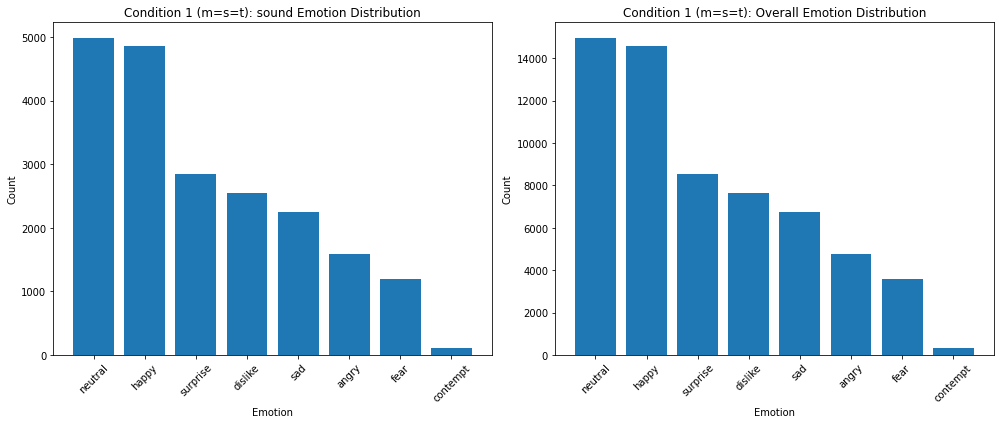

Condition 2 (m=s≠t) - 데이터 개수: 35464


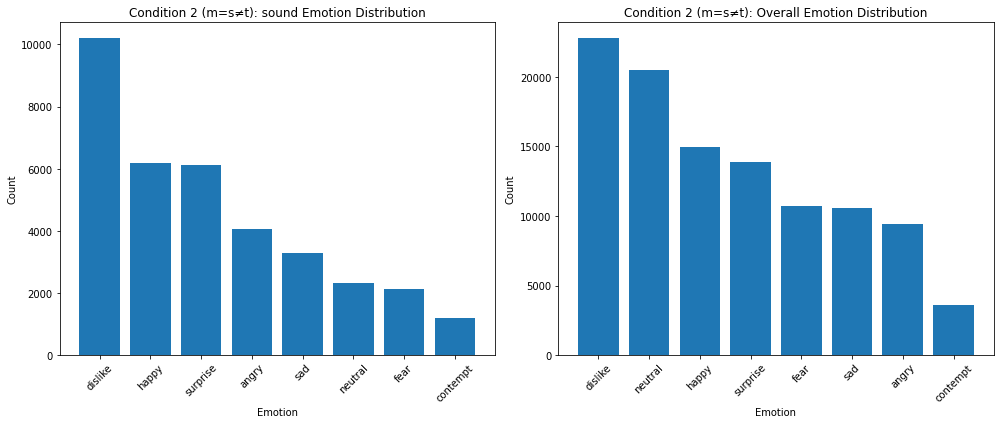

Condition 3 (m=t≠s) - 데이터 개수: 4668


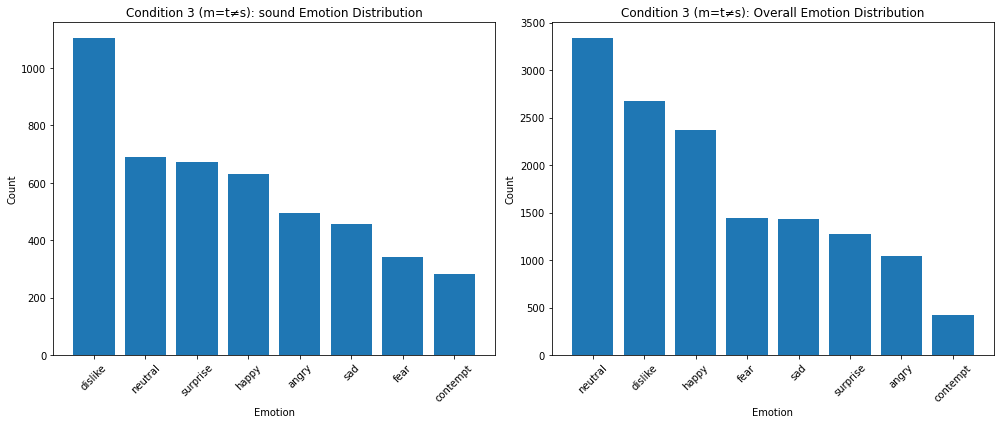

Condition 4 (m≠s=t) - 데이터 개수: 6095


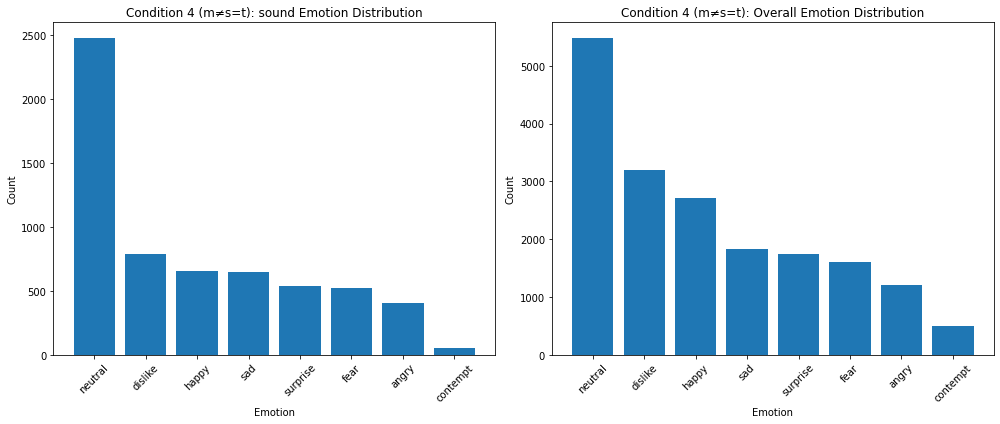

Condition 5 (m≠s≠t) - 데이터 개수: 11523


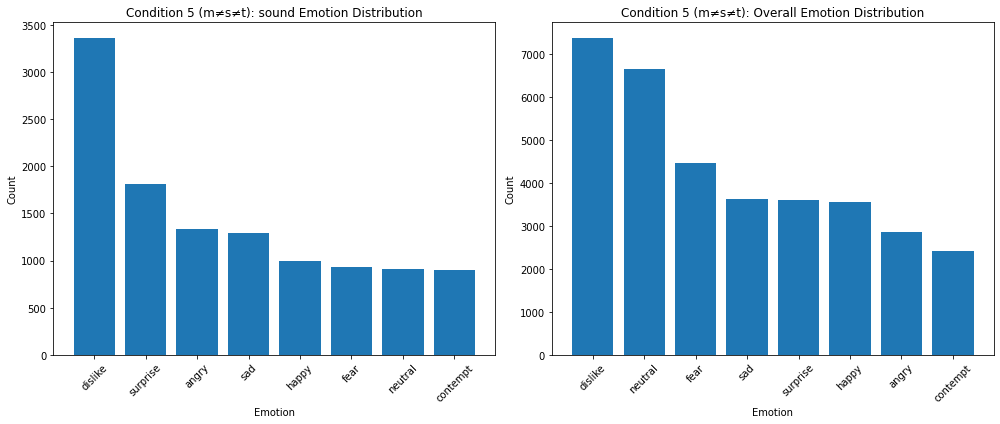

In [34]:
process(df, 'sound', conditions)

Condition 1 (m=s=t) - 데이터 개수: 20369


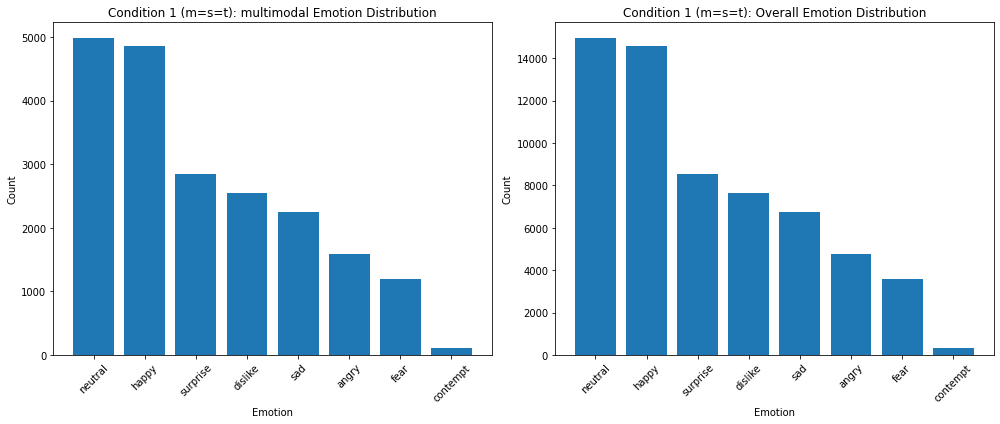

Condition 2 (m=s≠t) - 데이터 개수: 35464


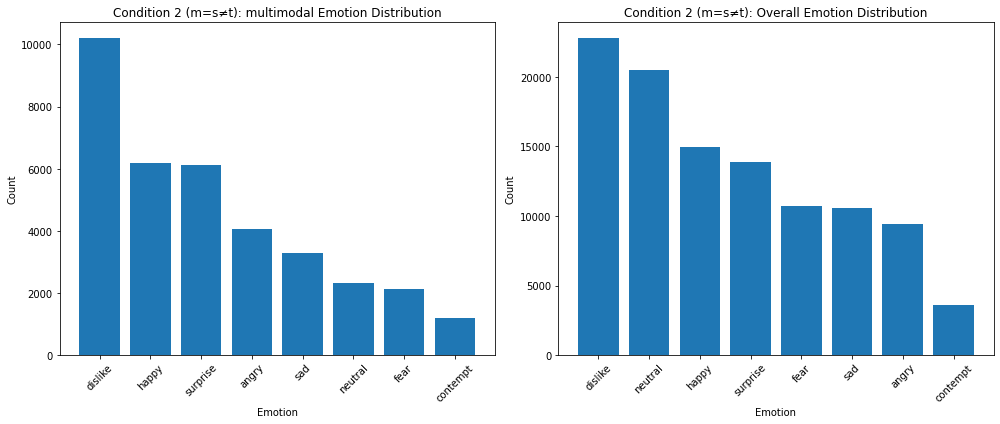

Condition 3 (m=t≠s) - 데이터 개수: 4668


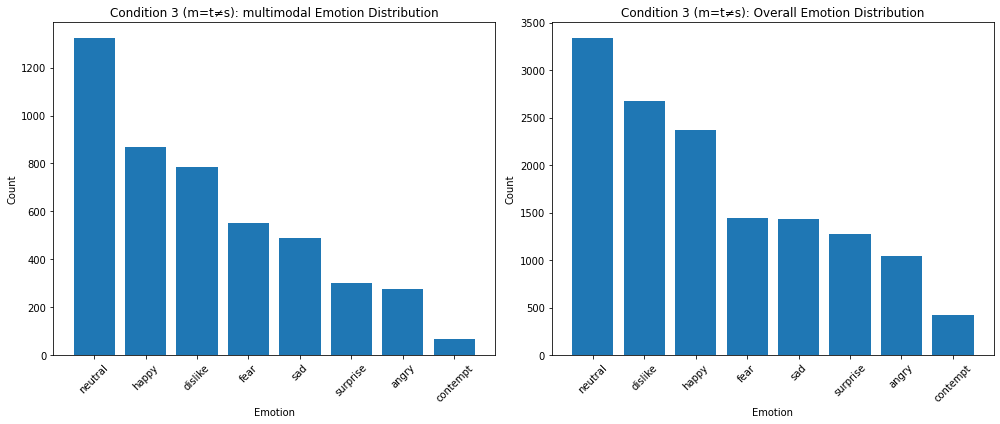

Condition 4 (m≠s=t) - 데이터 개수: 6095


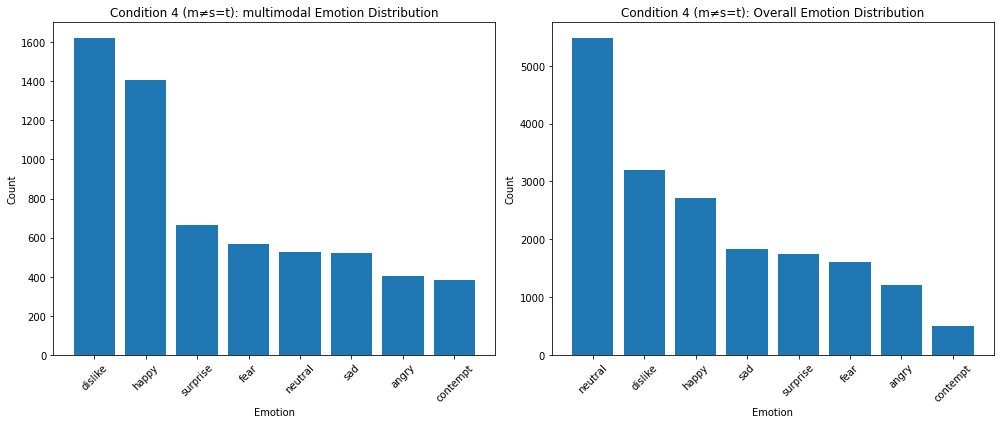

Condition 5 (m≠s≠t) - 데이터 개수: 11523


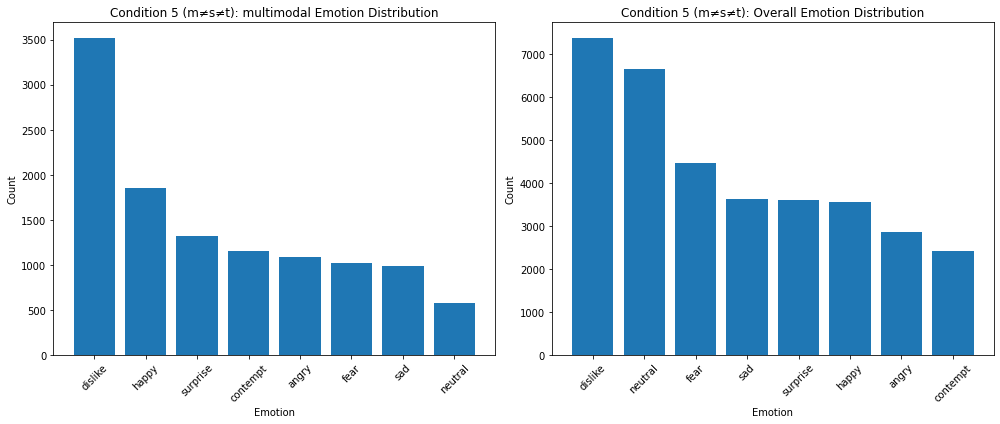

In [35]:
process(df, 'multimodal', conditions)

## 2) 각 condition 및 clip 별 데이터 분포 (문장 길이, 발화 길이, 감정 분포 등)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import ast

sns.set(style="whitegrid")

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [21]:
# from matplotlib import font_manager
# font_manager.findSystemFonts()

In [16]:
root_dir = '/aiffel/aiffel/AIFFELThon/data'
target_data = os.path.join(root_dir, 'output', 'all_5600.csv')
df_all_data = pd.read_csv(target_data)

In [17]:
df_all_data

,file_index,clip_id,actor,category,nr_frame,frame,object_id,label,predicate,person_id,...,sound_valence,sound_emotion,sound_arousal,multimodal_valence,multimodal_emotion,multimodal_arousal,text_valence,text_emotion,text_arousal,unit_folder
0,0001-0400_1_1,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,128,1,person,{},1,...,4,surprise,2,5,neutral,5,3,neutral,4,0001-0400
1,0001-0400_1_6,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,148,2,person,{'3': 'sit'},2,...,3,dislike,2,5,neutral,5,3,fear,3,0001-0400
2,0001-0400_1_4,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,255,1,person,{},1,...,4,surprise,1,5,neutral,5,3,angry,2,0001-0400
3,0001-0400_1_10,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,384,2,person,{'3': 'sit'},2,...,4,surprise,6,4,fear,4,3,fear,4,0001-0400
4,0001-0400_1_8,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,438,1,person,{},1,...,5,happy,1,5,neutral,6,2,angry,3,0001-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78980,5201-5600_5600_10,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1536,1,person,{},280,...,3,surprise,5,3,surprise,5,3,fear,7,5201-5600
78981,5201-5600_5600_4,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1679,2,person,{'2': 'sit'},279,...,3,dislike,6,3,dislike,6,4,sad,6,5201-5600
78982,5201-5600_5600_6,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1823,1,person,{},280,...,3,fear,6,3,fear,6,3,neutral,7,5201-5600
78983,5201-5600_5600_11,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1898,2,person,{'2': 'sit'},279,...,3,contempt,5,3,angry,5,5,neutral,1,5201-5600


In [18]:
# 데이터프레임에 존재한다고 가정하는 컬럼: sound_emotion (s), multimodal_emotion (m), text_emotion (t)

# 1. m=s=t: 분명하게 해당 감정이라고 동의하는 데이터
df_all_data['cond_1'] = (
    (df_all_data['multimodal_emotion'] == df_all_data['sound_emotion']) &
    (df_all_data['sound_emotion'] == df_all_data['text_emotion'])
)

# 2. m=s≠t: 텍스트만 있으면 정확하게 감정 파악 X인 데이터
df_all_data['cond_2'] = (
    (df_all_data['multimodal_emotion'] == df_all_data['sound_emotion']) &
    (df_all_data['sound_emotion'] != df_all_data['text_emotion'])
)

# 3. m=t≠s: 이미지와 텍스트로 판단한 감정과 음성을 듣고 판단한 감정이 다른 데이터
df_all_data['cond_3'] = (
    (df_all_data['multimodal_emotion'] == df_all_data['text_emotion']) &
    (df_all_data['sound_emotion'] != df_all_data['text_emotion'])
)

# 4. m≠s=t: 음성과 텍스트 각각 판단했을 때는 부정확하지만 두 정보 취합 시 정확한 감정 태깅 가능한 경우의 데이터
df_all_data['cond_4'] = (
    (df_all_data['sound_emotion'] == df_all_data['text_emotion']) &
    (df_all_data['multimodal_emotion'] != df_all_data['sound_emotion'])
)

# 5. m≠s≠t: 모든 정보가 다르고, 불일치 데이터
df_all_data['cond_5'] = (
    (df_all_data['multimodal_emotion'] != df_all_data['sound_emotion']) &
    (df_all_data['sound_emotion'] != df_all_data['text_emotion']) &
    (df_all_data['multimodal_emotion'] != df_all_data['text_emotion'])
)


In [19]:
df_all_data

,file_index,clip_id,actor,category,nr_frame,frame,object_id,label,predicate,person_id,...,multimodal_arousal,text_valence,text_emotion,text_arousal,unit_folder,cond_1,cond_2,cond_3,cond_4,cond_5
0,0001-0400_1_1,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,128,1,person,{},1,...,5,3,neutral,4,0001-0400,False,False,True,False,False
1,0001-0400_1_6,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,148,2,person,{'3': 'sit'},2,...,5,3,fear,3,0001-0400,False,False,False,False,True
2,0001-0400_1_4,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,255,1,person,{},1,...,5,3,angry,2,0001-0400,False,False,False,False,True
3,0001-0400_1_10,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,384,2,person,{'3': 'sit'},2,...,4,3,fear,4,0001-0400,False,False,True,False,False
4,0001-0400_1_8,1,"{'2': {'age': '20s', 'gender': 'female'}, '1':...",living,1076,438,1,person,{},1,...,6,2,angry,3,0001-0400,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78980,5201-5600_5600_10,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1536,1,person,{},280,...,5,3,fear,7,5201-5600,False,True,False,False,False
78981,5201-5600_5600_4,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1679,2,person,{'2': 'sit'},279,...,6,4,sad,6,5201-5600,False,True,False,False,False
78982,5201-5600_5600_6,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1823,1,person,{},280,...,6,3,neutral,7,5201-5600,False,True,False,False,False
78983,5201-5600_5600_11,5600,"{'280': {'age': '40s', 'gender': 'male'}, '279...",relationship,2062,1898,2,person,{'2': 'sit'},279,...,5,5,neutral,1,5201-5600,False,False,False,False,True


## 1) condition, record

In [20]:
# 조건들이 서로 배타적인지 확인
# 조건 컬럼 리스트
conditions = ['cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5']

mutually_exclusive = df_all_data[conditions].sum(axis=1) <= 1
print("\n모든 클립이 하나의 조건만 만족하는가?:", mutually_exclusive.all())


모든 클립이 하나의 조건만 만족하는가?: True


In [21]:
# 1. 각 condition 에서의 레코드(개별 발화) 개수

# 각 조건별 레코드(개별 발화) 개수 계산
condition_counts = df_all_data[conditions].sum()

print("각 조건별 레코드(개별 발화) 개수:")
print(condition_counts)

각 조건별 레코드(개별 발화) 개수:
cond_1    20607
cond_2    35865
cond_3     4710
cond_4     6150
cond_5    11653
dtype: int64


In [22]:
# 2. 각 clip 에서의 condition 데이터 개수 

# 클립별 조건의 존재 여부 집계 (클립 내에 조건이 하나라도 True인 경우 True)
clip_conditions = df_all_data.groupby('clip_id')[conditions].max().reset_index()

# 클립별 만족하는 조건의 개수
clip_conditions['num_conditions'] = clip_conditions[conditions].sum(axis=1)

# 조건 개수의 분포 확인
clip_condition_distribution = clip_conditions['num_conditions'].value_counts().sort_index()

print("\n클립별 만족하는 조건의 개수 분포:")
print(clip_condition_distribution)


클립별 만족하는 조건의 개수 분포:
1      14
2     557
3    1403
4    2194
5    1432
Name: num_conditions, dtype: int64


- 1: 해당 클립 내의 모든 발화가 단일 조건만을 만족합니다. 총 14개의 클립.
- 2: 두 가지 서로 다른 조건을 만족하는 발화가 존재하는 클립. 총 557개의 클립.
- 3: 세 가지 서로 다른 조건을 만족하는 발화가 존재하는 클립. 총 1,403개의 클립.
- 4: 네 가지 서로 다른 조건을 만족하는 발화가 존재하는 클립. 총 2,194개의 클립.
- 5: 모든 다섯 가지 조건을 만족하는 발화가 존재하는 클립. 총 1,432개의 클립.

In [23]:
# 3. 클립별 각 조건의 발화 수 집계
clip_condition_counts = df_all_data.groupby('clip_id')[conditions].sum().reset_index()

print("클립별 각 조건의 발화 수:")
clip_condition_counts

클립별 각 조건의 발화 수:


,clip_id,cond_1,cond_2,cond_3,cond_4,cond_5
0,1,4,0,2,0,4
1,2,2,2,3,2,1
2,3,6,4,1,2,0
3,4,1,4,0,3,3
4,5,0,4,1,0,5
...,...,...,...,...,...,...
5595,5596,1,7,1,0,2
5596,5597,1,10,0,0,4
5597,5598,0,8,2,0,5
5598,5599,2,10,1,0,2


In [24]:
# 4. 각 조건별 클립 개수
condition_clip_counts = clip_conditions[conditions].sum()

print("\n각 조건을 포함하는 클립(대화 파일) 개수:")
print(condition_clip_counts)


각 조건을 포함하는 클립(대화 파일) 개수:
cond_1    5248
cond_2    5567
cond_3    2848
cond_4    3311
cond_5    4299
dtype: int64


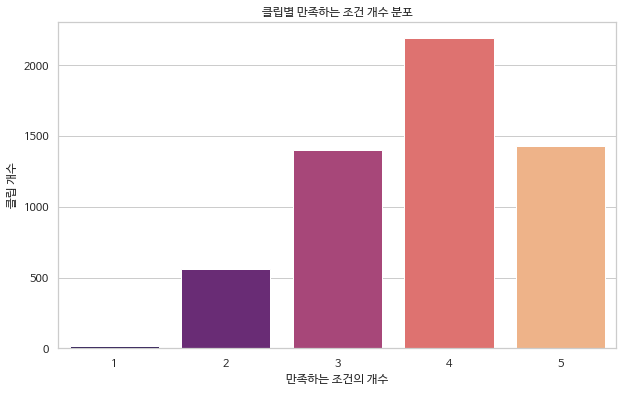

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='num_conditions', data=clip_conditions, palette="magma")
plt.xlabel('만족하는 조건의 개수')
plt.ylabel('클립 개수')
plt.title('클립별 만족하는 조건 개수 분포')
plt.show()

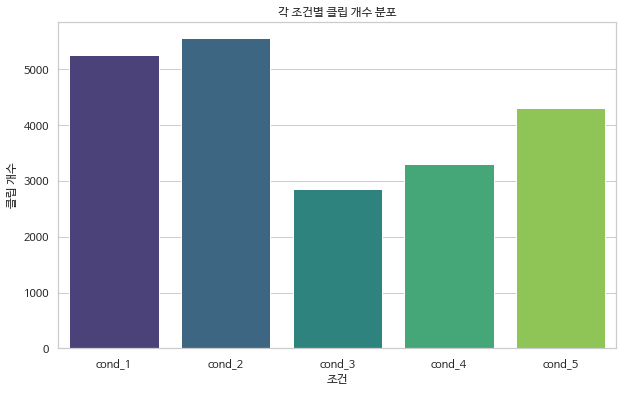

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_clip_counts.index, y=condition_clip_counts.values, palette="viridis")
plt.xlabel('조건')
plt.ylabel('클립 개수')
plt.title('각 조건별 클립 개수 분포')
plt.show()

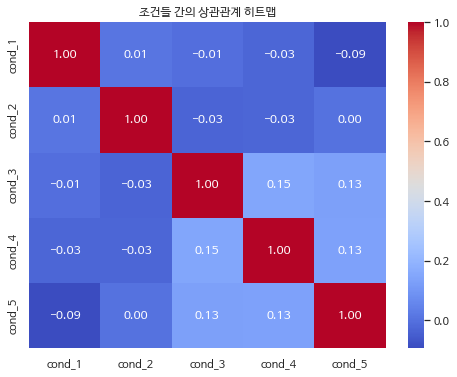

In [43]:
# 상관계수 행렬 계산
correlation_matrix = clip_conditions[['cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('조건들 간의 상관관계 히트맵')
plt.show()

## 2) Length of Sentences, Speech Duration

In [26]:
cond_1_df = df_all_data[df_all_data['cond_1']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_2_df = df_all_data[df_all_data['cond_2']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_3_df = df_all_data[df_all_data['cond_3']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_4_df = df_all_data[df_all_data['cond_4']].drop(columns=[f'cond_{i}' for i in range(1, 6)])
cond_5_df = df_all_data[df_all_data['cond_5']].drop(columns=[f'cond_{i}' for i in range(1, 6)])


In [25]:
def perform_eda(df, frame_rate=29.97):
    sns.set(style="whitegrid")
    # 1. Speaker 다양성 반영 정도 확인
    print("### Speaker 다양성 반영 정도 확인 ###")
    speaker_count = df['person_id'].nunique()
    print(f"고유 스피커 수 (person_id): {speaker_count}\n")
    # 2. 발화 길이 (Speech Duration) 계산
    print("### 발화 길이 (Speech Duration) 계산 ###")
    df['speech_duration'] = (df['script_end'] - df['script_start']) / frame_rate
    print(df[['script_start', 'script_end', 'speech_duration']].head(), "\n")
    # 3. 'morpheme' 컬럼이 문자열인 경우 리스트로 변환
    print("### 'morpheme' 컬럼 변환 ###")
    def parse_morpheme(morpheme_str):
        try:
            return ast.literal_eval(morpheme_str)
        except (ValueError, SyntaxError):
            return []
    # 'morpheme' 컬럼이 문자열인지 확인하고 변환
    if isinstance(df['morpheme'].iloc[0], str):
        df['morpheme'] = df['morpheme'].apply(parse_morpheme)
        print("'morpheme' 컬럼이 문자열로 인식되어 리스트로 변환되었습니다.\n")
    else:
        print("'morpheme' 컬럼이 이미 리스트 형태로 인식됩니다.\n")
    # 4. 문장 길이 (Counts of Morpheme) 계산
    print("### 문장 길이 (Counts of Morpheme) 계산 ###")
    try:
        if isinstance(df['morpheme'].iloc[0], list):
            if len(df['morpheme'].iloc[0]) > 0 and isinstance(df['morpheme'].iloc[0][0], list):
                # 리스트의 리스트 형태 (예: [['word1', 'TAG1'], ['word2', 'TAG2'], ...])
                df['morpheme_count'] = df['morpheme'].apply(len)
                print("문장 길이 (morpheme_count)가 모르펜 리스트의 길이로 계산되었습니다.\n")
            elif len(df['morpheme'].iloc[0]) > 0 and isinstance(df['morpheme'].iloc[0][0], str):
                # [word, tag] 형태의 리스트 (예: [['word1', 'TAG1'], ['word2', 'TAG2'], ...])
                df['morpheme_count'] = df['morpheme'].apply(len)
                print("문장 길이 (morpheme_count)가 [word, tag] 형태의 리스트 길이로 계산되었습니다.\n")
            else:
                raise TypeError("Unsupported 'morpheme' column format. Expected list of [word, tag] lists.")
        else:
            raise TypeError("Unsupported 'morpheme' column format. Expected list of [word, tag] lists.")
    except TypeError as e:
        print(f"오류: {e}")
        return
    # 5. 문장 길이 결과 확인
    print("### 문장 길이 결과 확인 ###")
    print(df[['morpheme', 'morpheme_count']].head(), "\n")
    # 6. 발화 길이 분포 시각화
    print("### 발화 길이 (Speech Duration) 분포 시각화 ###")
    plt.figure(figsize=(12, 6))
    sns.histplot(df['speech_duration'], bins=50, kde=True, color='skyblue')
    plt.title('Speech Duration Distribution')
    plt.xlabel('Speech Duration (s)')
    plt.ylabel('Frequency')
    plt.show()
    # 7. 문장 길이 분포 시각화
    print("### 문장 길이 (Counts of Morpheme) 분포 시각화 ###")
    plt.figure(figsize=(12, 6))
    sns.histplot(df['morpheme_count'], bins=50, kde=True, color='salmon')
    plt.title('Length of Sentences (Counts of Morpheme)')
    plt.xlabel('Counts of Morpheme')
    plt.ylabel('Frequency')
    plt.show()
    # 8. 발화 길이와 문장 길이의 관계 시각화
    print("### 발화 길이와 문장 길이의 관계 시각화 ###")
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='morpheme_count', y='speech_duration', data=df, alpha=0.5)
    plt.title('Morpheme Count vs Speech Duration')
    plt.xlabel('Counts of Morpheme')
    plt.ylabel('Speech Duration (s)')
    plt.show()
    # 상관계수 계산 및 출력
    correlation = df['morpheme_count'].corr(df['speech_duration'])
    print(f"문장 길이와 발화 길이의 상관계수: {correlation:.2f}\n")
    # 9. 요약 통계 확인
    print("### 발화 길이 (Speech Duration) 통계 ###")
    speech_duration_stats = df['speech_duration'].describe()
    print(speech_duration_stats, "\n")
    print("### 문장 길이 (Counts of Morpheme) 통계 ###")
    morpheme_count_stats = df['morpheme_count'].describe()
    print(morpheme_count_stats, "\n")
    print("### EDA 완료 ###")

### Speaker 다양성 반영 정도 확인 ###
고유 스피커 수 (person_id): 280

### 발화 길이 (Speech Duration) 계산 ###
    script_start  script_end  speech_duration
5            531         647         3.870537
6            656         724         2.268936
8            851         957         3.536870
9            966        1046         2.669336
13           357         445         2.936270 

### 'morpheme' 컬럼 변환 ###
'morpheme' 컬럼이 문자열로 인식되어 리스트로 변환되었습니다.

### 문장 길이 (Counts of Morpheme) 계산 ###
문장 길이 (morpheme_count)가 모르펜 리스트의 길이로 계산되었습니다.

### 문장 길이 결과 확인 ###
                                             morpheme  morpheme_count
5   [[아, IC], [., SF], [., SF], [그것, NP], […, SE],...              16
6   [[뭐, IC], [?, SF], [그것, NP], [니, NP], [가, JKS]...               9
8   [[야, IC], [!, SF], [내, NP], [허락, NNG], [도, JX]...              16
9   [[되, VV], [었, EP], [다, EC], [,, SP], [되, VV], ...              18
13  [[너, NP], [아직, MAG], [도, JX], [정신, NNG], [못, M...               9 

### 발화 길이 (Speech Duration) 분포 시각화 ###


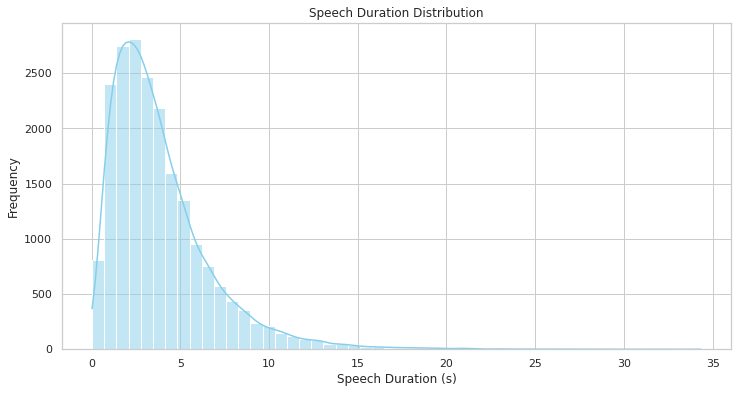

### 문장 길이 (Counts of Morpheme) 분포 시각화 ###


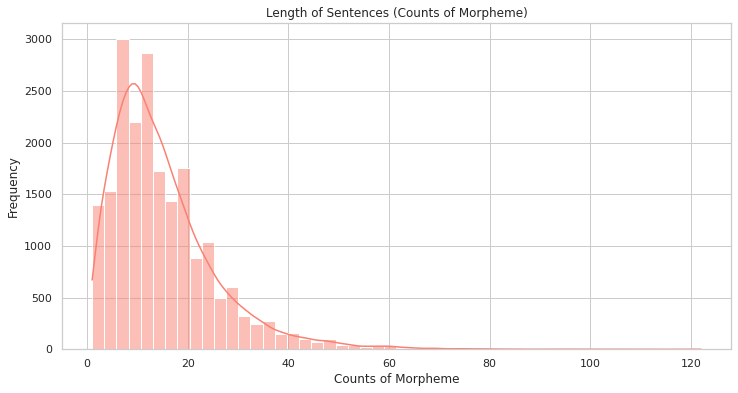

### 발화 길이와 문장 길이의 관계 시각화 ###


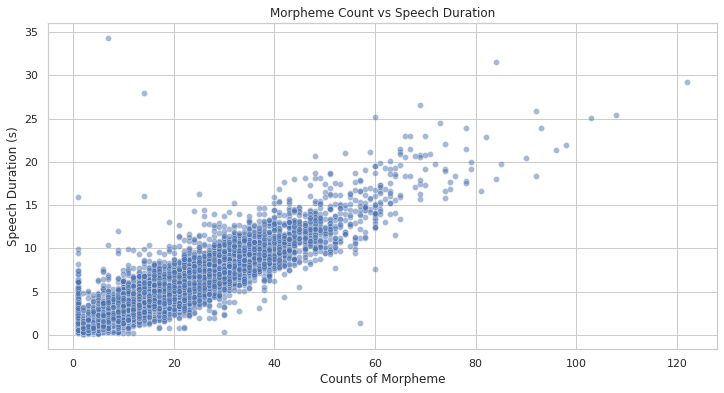

문장 길이와 발화 길이의 상관계수: 0.91

### 발화 길이 (Speech Duration) 통계 ###
count    20607.000000
mean         3.875424
std          2.865949
min          0.033367
25%          1.901902
50%          3.203203
75%          5.038372
max         34.334334
Name: speech_duration, dtype: float64 

### 문장 길이 (Counts of Morpheme) 통계 ###
count    20607.000000
mean        15.073228
std         10.563380
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        122.000000
Name: morpheme_count, dtype: float64 

### EDA 완료 ###


In [27]:
perform_eda(cond_1_df)

### Speaker 다양성 반영 정도 확인 ###
고유 스피커 수 (person_id): 280

### 발화 길이 (Speech Duration) 계산 ###
    script_start  script_end  speech_duration
11           147         254         3.570237
14           487         558         2.369036
23           224         341         3.903904
27           631         776         4.838172
28           821         881         2.002002 

### 'morpheme' 컬럼 변환 ###
'morpheme' 컬럼이 문자열로 인식되어 리스트로 변환되었습니다.

### 문장 길이 (Counts of Morpheme) 계산 ###
문장 길이 (morpheme_count)가 모르펜 리스트의 길이로 계산되었습니다.

### 문장 길이 결과 확인 ###
                                             morpheme  morpheme_count
11  [[오늘, NNG], [도, JX], [아니, VCN], [고, EC], [내일, ...              14
14  [[정신, NNG], [못, MAG], [차리, VV], [었, EP], [다니, ...              12
23  [[야, IC], [,, SP], [니, NP], [가, JKS], [무슨, MM]...              22
27  [[내, NP], [가, JKS], [돈, NNG], [이, JKS], [어딨냐?,...              20
28  [[내, NP], [가, JKS], [차, NNB], [사면, NNP], [너, N...              12 

### 발화 길이 (Speech Duration) 분포 시각화 ###


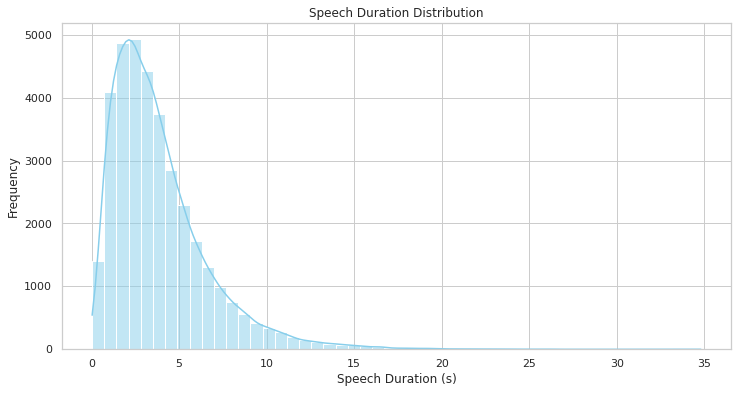

### 문장 길이 (Counts of Morpheme) 분포 시각화 ###


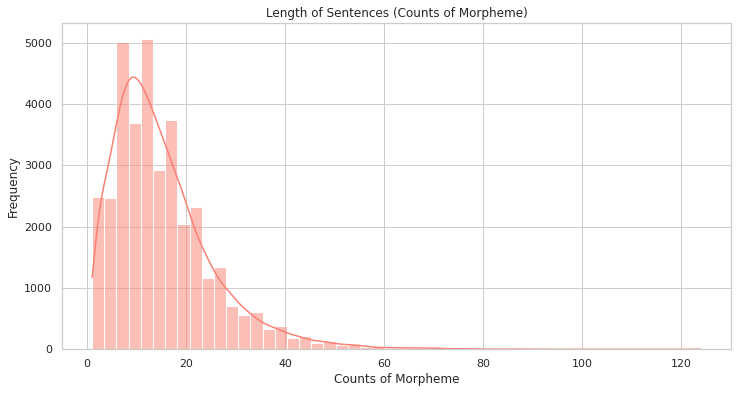

### 발화 길이와 문장 길이의 관계 시각화 ###


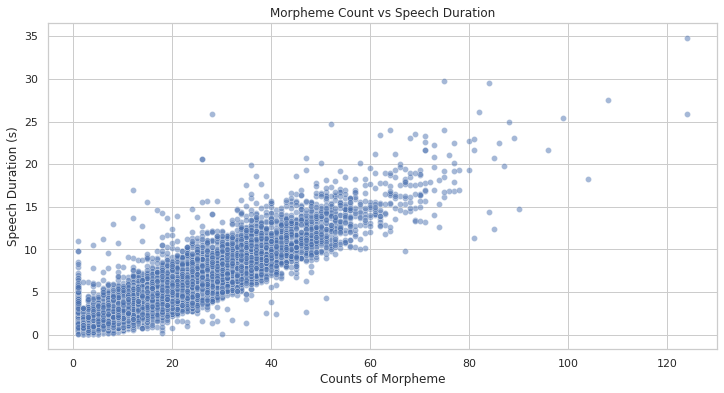

문장 길이와 발화 길이의 상관계수: 0.91

### 발화 길이 (Speech Duration) 통계 ###
count    35865.000000
mean         3.877447
std          2.794082
min          0.033367
25%          1.935269
50%          3.236570
75%          5.071738
max         34.801468
Name: speech_duration, dtype: float64 

### 문장 길이 (Counts of Morpheme) 통계 ###
count    35865.000000
mean        15.250383
std         10.447936
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        124.000000
Name: morpheme_count, dtype: float64 

### EDA 완료 ###


In [28]:
perform_eda(cond_2_df)

### Speaker 다양성 반영 정도 확인 ###
고유 스피커 수 (person_id): 280

### 발화 길이 (Speech Duration) 계산 ###
    script_start  script_end  speech_duration
0             31         131         3.336670
3            331         416         2.836170
15           562         697         4.504505
16           717         882         5.505506
18           977        1023         1.534868 

### 'morpheme' 컬럼 변환 ###
'morpheme' 컬럼이 문자열로 인식되어 리스트로 변환되었습니다.

### 문장 길이 (Counts of Morpheme) 계산 ###
문장 길이 (morpheme_count)가 모르펜 리스트의 길이로 계산되었습니다.

### 문장 길이 결과 확인 ###
                                             morpheme  morpheme_count
0   [[야, IC], [,, SP], [여기, NP], [있, VV], [던, ETM]...              12
3   [[친구, NNG], [한테, JKB], […, SE], [선물, NNP], [받,...               8
15  [[내일, NNG], [두, MM], [시, NNB], [라면, NNP], [,, ...              18
16  [[야, IC], [,, SP], [그것, NP], [는, JX], [,, SP],...              27
18   [[중요, XR], [하, XSA], [지, EC], [그럼, IC], [!, SF]]               5 

### 발화 길이 (Speech Duration) 분포 시각화 ###


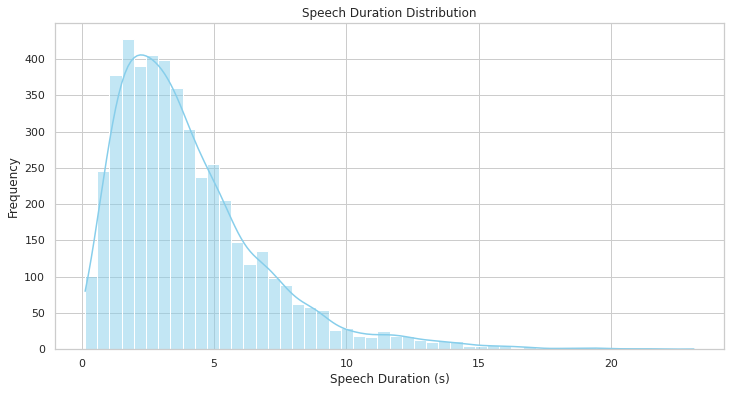

### 문장 길이 (Counts of Morpheme) 분포 시각화 ###


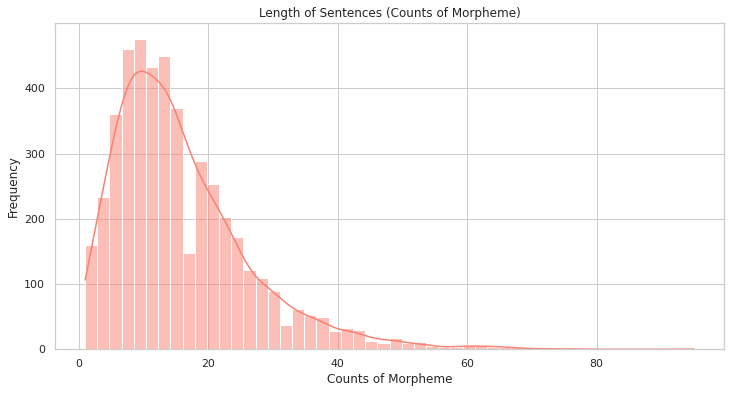

### 발화 길이와 문장 길이의 관계 시각화 ###


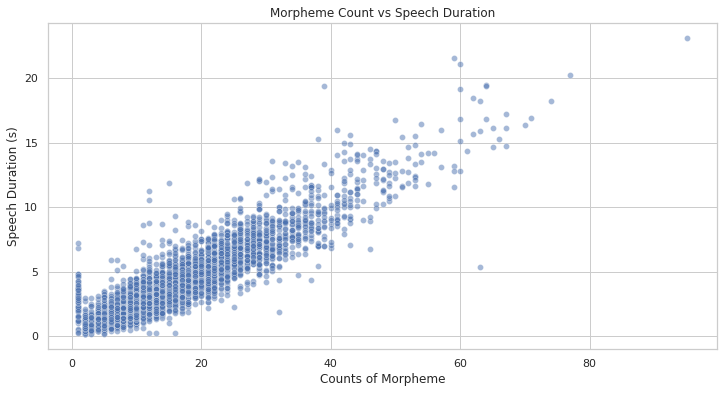

문장 길이와 발화 길이의 상관계수: 0.91

### 발화 길이 (Speech Duration) 통계 ###
count    4710.000000
mean        4.031328
std         2.832180
min         0.133467
25%         2.035369
50%         3.370037
75%         5.238572
max        23.123123
Name: speech_duration, dtype: float64 

### 문장 길이 (Counts of Morpheme) 통계 ###
count    4710.000000
mean       15.817410
std        10.566025
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        95.000000
Name: morpheme_count, dtype: float64 

### EDA 완료 ###


In [29]:
perform_eda(cond_3_df)

### Speaker 다양성 반영 정도 확인 ###
고유 스피커 수 (person_id): 280

### 발화 길이 (Speech Duration) 계산 ###
    script_start  script_end  speech_duration
10            31         128         3.236570
17           887         971         2.802803
20            31          71         1.334668
22           151         204         1.768435
35           281         361         2.669336 

### 'morpheme' 컬럼 변환 ###
'morpheme' 컬럼이 문자열로 인식되어 리스트로 변환되었습니다.

### 문장 길이 (Counts of Morpheme) 계산 ###
문장 길이 (morpheme_count)가 모르펜 리스트의 길이로 계산되었습니다.

### 문장 길이 결과 확인 ###
                                             morpheme  morpheme_count
10  [[새, MM], [나야, NNP], [,, SP], [나, NP], [내일, NN...              22
17  [[지금, MAG], [니, NP], [네, XSN], [오빠, NNG], [들, ...              11
20    [[나, NP], [차, NNB], [사, VV], [려고, EF], [., SF]]               5
22  [[응, IC], [,, SP], [한대, NNP], [뽑기, NNP], [로, J...               9
35  [[그냥, MAG], [,, SP], [좀, MAG], [이상, XR], [하, X...              15 

### 발화 길이 (Speech Duration) 분포 시각화 ###


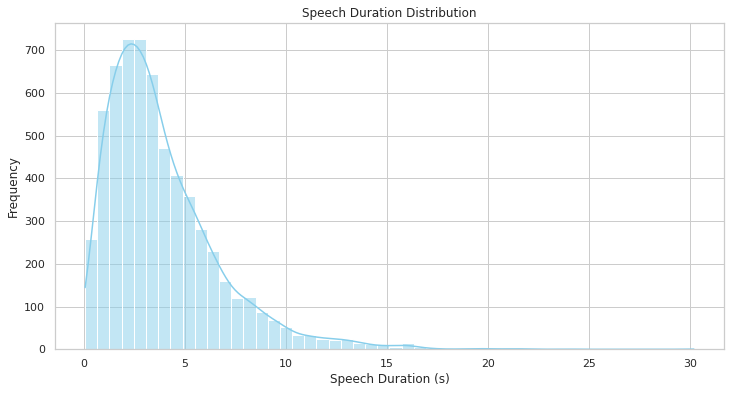

### 문장 길이 (Counts of Morpheme) 분포 시각화 ###


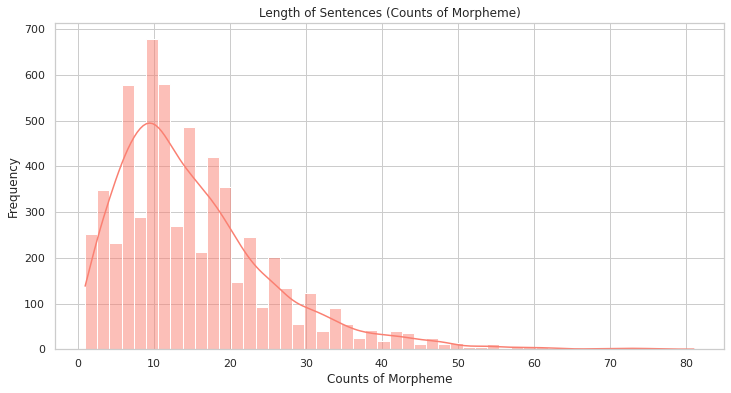

### 발화 길이와 문장 길이의 관계 시각화 ###


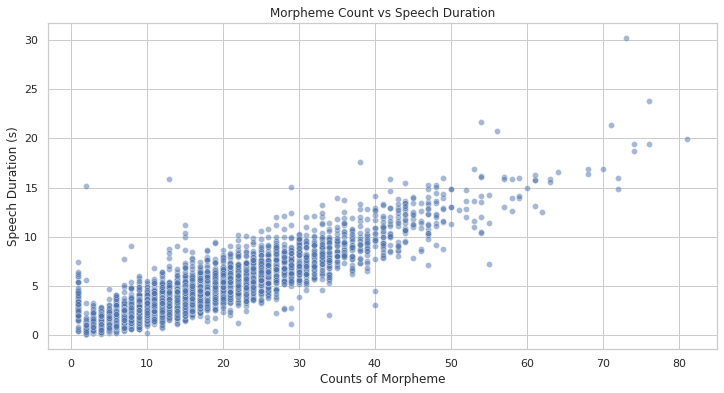

문장 길이와 발화 길이의 상관계수: 0.90

### 발화 길이 (Speech Duration) 통계 ###
count    6150.000000
mean        3.887758
std         2.798823
min         0.066733
25%         1.935269
50%         3.236570
75%         5.138472
max        30.196864
Name: speech_duration, dtype: float64 

### 문장 길이 (Counts of Morpheme) 통계 ###
count    6150.000000
mean       15.227480
std        10.327242
min         1.000000
25%         8.000000
50%        13.000000
75%        20.000000
max        81.000000
Name: morpheme_count, dtype: float64 

### EDA 완료 ###


In [30]:
perform_eda(cond_4_df)

### Speaker 다양성 반영 정도 확인 ###
고유 스피커 수 (person_id): 280

### 발화 길이 (Speech Duration) 계산 ###
    script_start  script_end  speech_duration
1            141         194         1.768435
2            211         302         3.036370
4            423         519         3.203203
7            741         841         3.336670
12           258         347         2.969636 

### 'morpheme' 컬럼 변환 ###
'morpheme' 컬럼이 문자열로 인식되어 리스트로 변환되었습니다.

### 문장 길이 (Counts of Morpheme) 계산 ###
문장 길이 (morpheme_count)가 모르펜 리스트의 길이로 계산되었습니다.

### 문장 길이 결과 확인 ###
                                             morpheme  morpheme_count
1   [[무슨, MM], [옷, NNG], [말, NNG], [하, XSV], [는, E...               8
2   [[그것, NP], [,, SP], [내, NP], [가, JKS], [생일, NN...              13
4   [[그래, IC], [,, SP], [그, MM], [남색, NNP], [에, JK...              16
7   [[아이, NNG], [,, SP], [그것, NP], [좀, MAG], [입, V...              15
12  [[뭐, NP], [ㄴ, JX], [소리, NNG], [는, JX], [,, SP]...              22 

### 발화 길이 (Speech Duration) 분포 시각화 ###


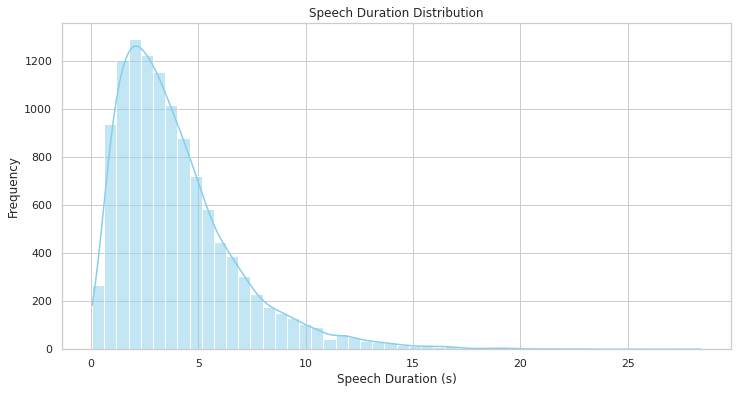

### 문장 길이 (Counts of Morpheme) 분포 시각화 ###


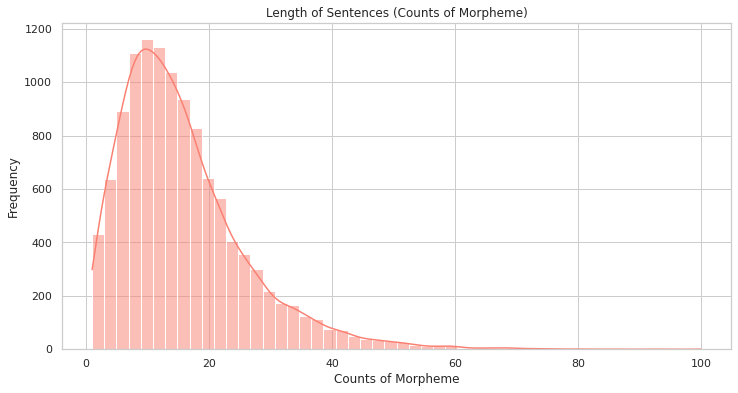

### 발화 길이와 문장 길이의 관계 시각화 ###


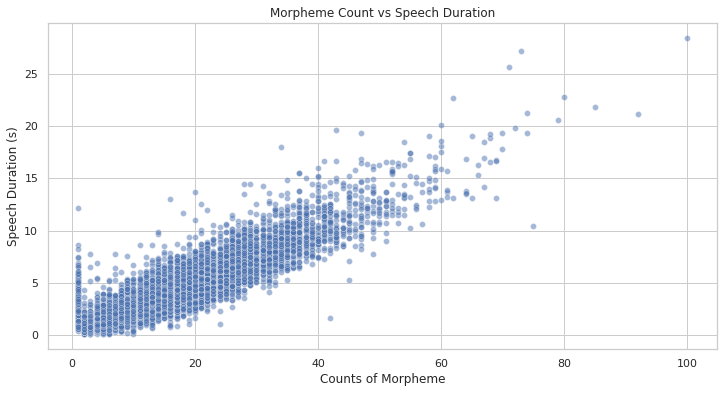

문장 길이와 발화 길이의 상관계수: 0.91

### 발화 길이 (Speech Duration) 통계 ###
count    11653.000000
mean         3.975637
std          2.821791
min          0.066733
25%          1.968635
50%          3.336670
75%          5.205205
max         28.395062
Name: speech_duration, dtype: float64 

### 문장 길이 (Counts of Morpheme) 통계 ###
count    11653.000000
mean        15.518321
std         10.357170
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        100.000000
Name: morpheme_count, dtype: float64 

### EDA 완료 ###


In [31]:
perform_eda(cond_5_df)